# Import Library and Dataset

In [219]:
import pandas as pd
from pandas import DataFrame,Series
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [220]:
netflix = pd.read_csv('../input/netflix-shows/netflix_titles.csv')

# Data Exploration

In [221]:
#data info show and first 5 row
netflix.info()

netflix.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


from "date_added" I need to chenge format date from Month D,Yr to YYYY-MM-DD

In [222]:
#change format date from Month D,Yr to YYYY-MM-DD
netflix['date_added'] = pd.to_datetime(netflix['date_added'])

netflix.info()

netflix.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


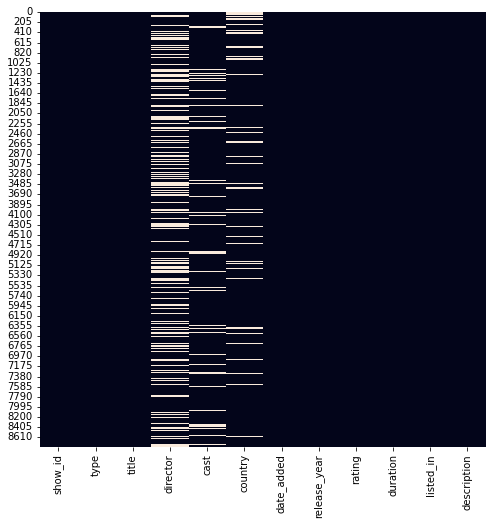

In [223]:
#count missing value
missing_value_count = netflix.isnull().sum()
missing_value_count

#viz missing value in hearmap
plt.figure(figsize=(8,8))
sns.heatmap(netflix.isnull(), cbar=False)
plt.show()

The column "director" has the most empty values, followed by "country," "cast," and "date added."
I won't use prediction as this column is of the string type and independent of other variables.

## What are the type of contents
Analyze the variable and "type" indicates if the item is a Movie or a TV show.

6131 movies and 2676 TV shows


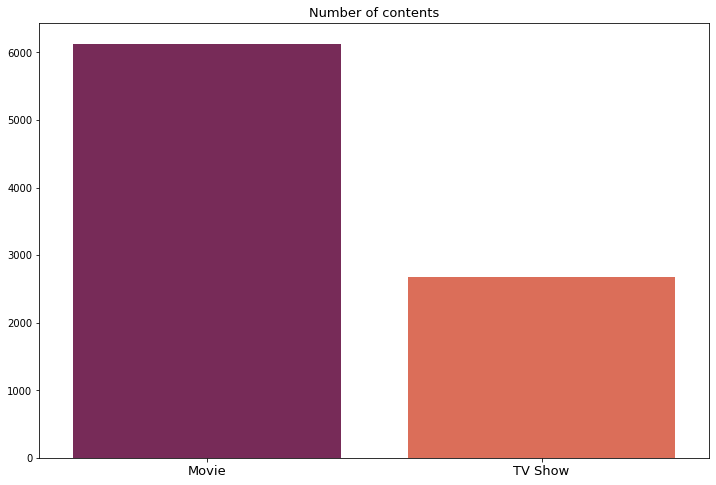

In [224]:
#text
movie = netflix[netflix["type"]=="Movie"]
tvshow = netflix[netflix["type"]=="TV Show"]

#viz
plt.figure(figsize=(12,8))
sns.countplot(x='type', data=netflix, palette="rocket")
plt.xticks(fontsize=13)
plt.yticks(fontsize=10)
plt.title("Number of contents", fontsize = 13)
plt.xlabel("")
plt.ylabel("")

#print
print("{} movies and {} TV shows".format(movie.shape[0],tvshow.shape[0]))
plt.show()

## Rating

In [225]:
kids = ['TV-Y','G','TV-T7','TV-Y7-FV','TV-G','PG','TV-PG']
teens = ['PG-13','TV-14']
adult = ['R','TV-MA','NC-17']

netflix_rating = pd.DataFrame(netflix ['rating'],columns = ['rating'])

def age(x):
    if x in kids :
        return 'Kids'
    if x in teens:
        return 'Teens'    
    if x in adult :
        return 'Adults'
    else:
        return 'Not Rated'
netflix_rating['ages'] = netflix['rating'].apply(age)

netflix_rating

,rating,ages
0,PG-13,Teens
1,TV-MA,Adults
2,TV-MA,Adults
3,TV-MA,Adults
4,TV-MA,Adults
...,...,...
8802,R,Adults
8803,TV-Y7,Not Rated
8804,R,Adults
8805,PG,Kids


In [226]:
#count show number for each rating
nr = netflix_rating.groupby(['ages','rating']).agg(number=('rating','count')).sort_values(by = 'ages').reset_index()

nr

,ages,rating,number
0,Adults,NC-17,3
1,Adults,R,799
2,Adults,TV-MA,3207
3,Kids,TV-Y,307
4,Kids,TV-PG,863
5,Kids,TV-Y7-FV,6
6,Kids,PG,287
7,Kids,G,41
8,Kids,TV-G,220
9,Not Rated,66 min,1


In [227]:
#viz of rating
fig = px.sunburst(nr,path = ['ages','rating'], values = 'number')

fig.show()

## Genre

In [228]:
netflix['listed_in'].head(3)

0                                        Documentaries
1      International TV Shows, TV Dramas, TV Mysteries
2    Crime TV Shows, International TV Shows, TV Act...
Name: listed_in, dtype: object

In [229]:
df = netflix
#split rows and put to new dataframe
new_df = pd.DataFrame(df.listed_in.str.split(',').tolist()).stack()
new_df = pd.DataFrame(new_df).reset_index()
new_df.columns = ['a','b','genre']
new_df.drop(columns=['a','b'],inplace = True)
new_df['genre'] = new_df['genre'].str.strip()

new_df[:5]

,genre
0,Documentaries
1,International TV Shows
2,TV Dramas
3,TV Mysteries
4,Crime TV Shows


In [230]:
#count of genre
genre = pd.DataFrame(new_df[['genre']].value_counts()).reset_index()
genre.columns = ['genre','count']
genre[:10]

,genre,count
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869
5,Action & Adventure,859
6,TV Dramas,763
7,Independent Movies,756
8,Children & Family Movies,641
9,Romantic Movies,616


In [231]:
#viz of genre
fig = px.bar(genre[:10], x = 'genre',y = 'count')

fig.show()

## Country (making contents)

In [232]:
netflix['country'] = netflix['country'].fillna("null")
netflix_country = pd.concat([Series(row['date_added'], row['country'].split(','))
                             for _, row in netflix.iterrows()]).reset_index()
netflix_country.columns = ['country','date_added']

netflix_country

,country,date_added
0,United States,2021-09-25
1,South Africa,2021-09-24
2,null,2021-09-24
3,null,2021-09-24
4,India,2021-09-24
...,...,...
10845,United States,2019-11-20
10846,null,2019-07-01
10847,United States,2019-11-01
10848,United States,2020-01-11


In [233]:
netflix_country['country'] = netflix_country['country'].str.strip()
contents_by_country = netflix_country['country'].value_counts().to_frame().reset_index()
contents_by_country.columns = ['country','number of contents']

contents_by_country

,country,number of contents
0,United States,3690
1,India,1046
2,null,831
3,United Kingdom,806
4,Canada,445
...,...,...
119,Ecuador,1
120,Armenia,1
121,Mongolia,1
122,Bahamas,1


In [234]:
#delete null row (index = 3)

contents_by_country.drop([3])

,country,number of contents
0,United States,3690
1,India,1046
2,null,831
4,Canada,445
5,France,393
...,...,...
119,Ecuador,1
120,Armenia,1
121,Mongolia,1
122,Bahamas,1


In [235]:
netflix_country = netflix_country.sort_values(by = 'date_added', ascending = False)
netflix_country['n'] = 1
date_country = netflix_country.groupby(['country','date_added']).sum().groupby(level = 0).cumsum().reset_index()

date_country.sort_values(by = 'n')

,country,date_added,n
0,,2014-11-07,1
2710,Mongolia,2017-08-15,1
2559,Mexico,2011-05-17,1
2557,Mauritius,2019-12-20,1
2554,Malta,2020-02-16,1
...,...,...,...
5599,United States,2021-09-19,3679
5600,United States,2021-09-20,3680
5601,United States,2021-09-22,3681
5602,United States,2021-09-24,3683


In [236]:
netflix_country[netflix_country['country'] == 'United States']

,country,date_added,n
0,United States,2021-09-25,1
14,United States,2021-09-24,1
7,United States,2021-09-24,1
21,United States,2021-09-22,1
33,United States,2021-09-20,1
...,...,...,...
8184,United States,NaT,1
8198,United States,NaT,1
8792,United States,NaT,1
8975,United States,NaT,1


In [237]:
netflix_country[netflix_country['date_added'].isnull()]

,country,date_added,n
7243,United Kingdom,NaT,1
7378,United States,NaT,1
8184,United States,NaT,1
8198,United States,NaT,1
8341,Japan,NaT,1
8714,null,NaT,1
8792,United States,NaT,1
8975,United States,NaT,1
9536,United States,NaT,1
9989,Australia,NaT,1


In [238]:
#Replace NaT with 22-10-2009
netflix_country['date_added'].fillna(pd.Timestamp('20150101'),inplace = True)
date_country = netflix_country.groupby(['country','date_added']).sum().groupby(level = 0).cumsum().reset_index()
pd.DataFrame(date_country.groupby(['country'])['n'].max()).sort_values('n',ascending = False)

,n
country,
United States,3690
India,1046
null,831
United Kingdom,806
Canada,445
...,...
Cyprus,1
Afghanistan,1
Cuba,1


In [239]:
#viz contents by country
top10_country = contents_by_country[:10].set_index('country')
dc = date_country[date_country['country'].isin(top10_country.index.tolist())]
fig = px.line(dc, x = 'date_added', y = 'n', color = 'country')

fig.show()